In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Get Working Directory
#cwd = os.getcwd()
cwd = 'C:\Vibhaas\personal\Data Science Study\Projects\Kaggle\Titanic\Attempt 2\Dataset'

# load the dataset
file = cwd+'\\train.csv'
df_titanic_basedata_train_0 = pd.read_csv(file)

In [3]:
df_titanic_basedata_train_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# load the dataset
file = cwd+'\\test.csv'
df_titanic_basedata_test_0 = pd.read_csv(file)

In [5]:
df_titanic_basedata_test_0.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Let's check data types, we are dealing with
df_titanic_basedata_train_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# so over here we can see there are 5 variables with data type as integer, 2 with float, & 5 as object.
# Also Column cabin has more than 77% missing values, so ill drop this column later. Column Embarked has 2 missing values which can be easily imputed
# Challenge is dealing with age column.
# now we will perform a basic check on features

df_titanic_basedata_train_0.describe()

# This will show us 1, 2, 3 quartiles, how spread our data is and also we can figure out some basic ouliers through this.
# For Eg: minimum fare is 0, who are those and did they survive?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
##Lets Analyze data

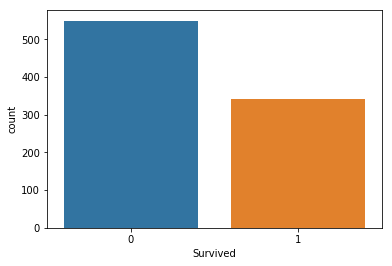

In [11]:
# we will analyze categorical variables:
sns.countplot(x= 'Survived', data = df_titanic_basedata_train_0)

# count of survival is less.

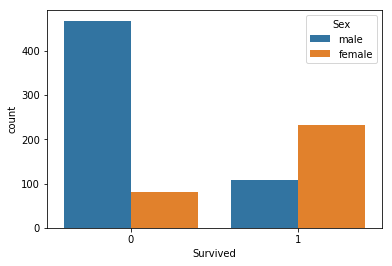

In [12]:
# Now we will check survival rate with respect to gender:
sns.countplot(x= 'Survived',hue='Sex',  data = df_titanic_basedata_train_0)
# seeing plot we can say that survival rate of female is high.

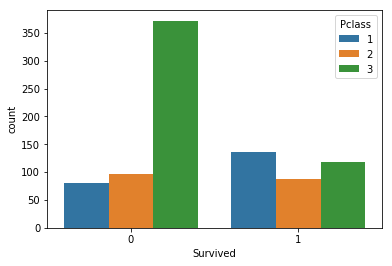

In [13]:
# Now we will check survival rate with respect to Pclass:
sns.countplot(x= 'Survived',hue='Pclass',  data = df_titanic_basedata_train_0)
# seeing plot we can say that survival rate of passengers in 1st class is high on the other side, count of survival for passengers of class-3 was very low 

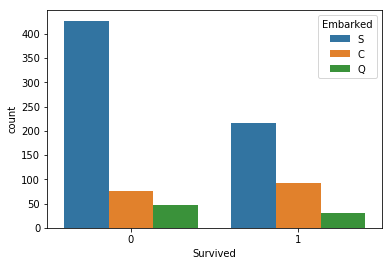

In [14]:
# Now we will check survival rate with respect to Embarked
sns.countplot(x= 'Survived',hue='Embarked',  data = df_titanic_basedata_train_0)
# seeing plot we can say that maximum people are from S = Southampton, survival rate of people from C = Cherbourg is decent.

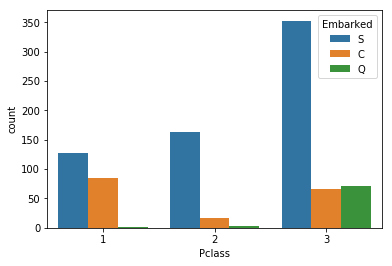

In [15]:
# Now we will check Pclass with Embarked
sns.countplot(x= 'Pclass',hue='Embarked',  data = df_titanic_basedata_train_0)
# the reason above we saw S = Southampton had low rate of survival because majority of them are in class 3, 
# and survival rate of people from C = Cherbourg is decent because majority fo them belonged to 1st class.

(7, 0)

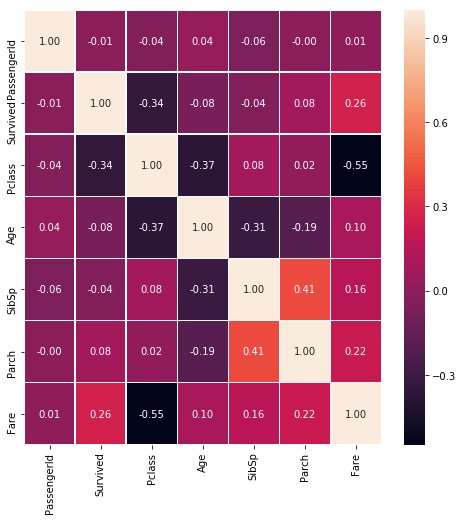

In [16]:
# Now we will check Collinearity among to avoid Multicollinearity issues.
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_titanic_basedata_train_0.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

# Eg: so it's common that higher the pclass, higher is the fare. Hence we would drop one of them to avoid redundant data, also passenger_Id will be dropped since not contributing to dependent variable.
# once all our categorical data has been converted we can also check Variance inflation factor, and correlation again.

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


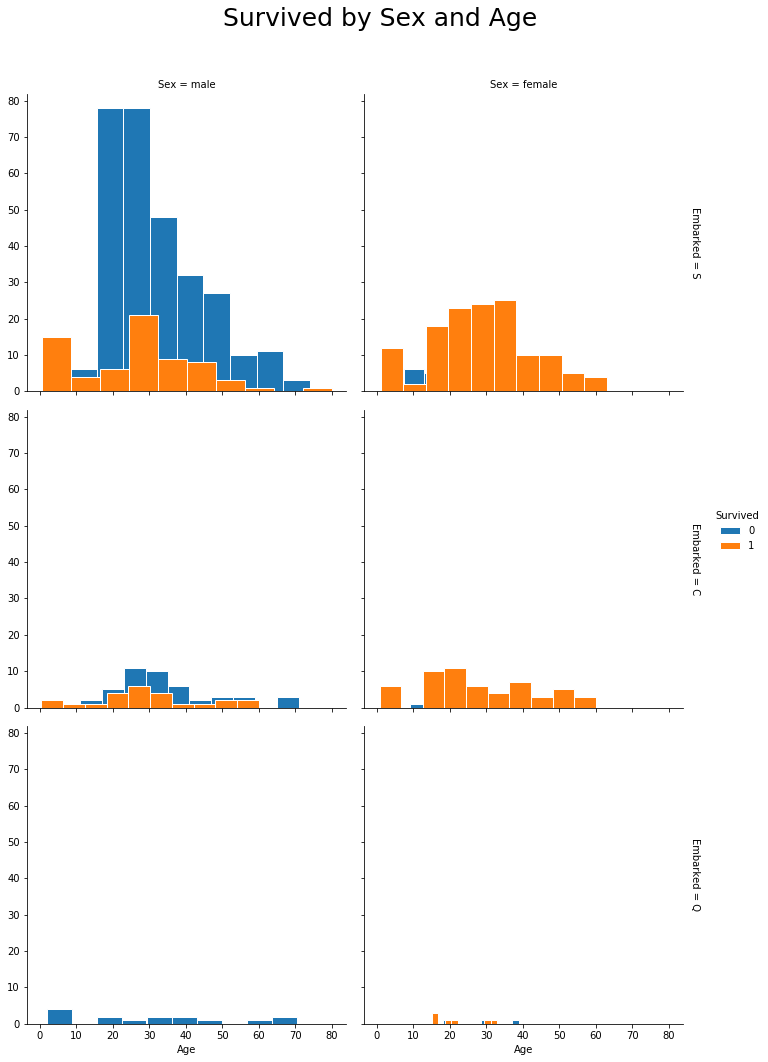

In [17]:
#Survived by Sex and Age

ploteg = sns.FacetGrid(df_titanic_basedata_train_0,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived"
                  )
plotegg = ploteg.map(plt.hist, "Age", edgecolor = 'white').add_legend();
ploteg.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

In [18]:
##Imputation

In [19]:
# let's check missing values in both training and test data

df_titanic_basedata_train_0.info()
print('*' *100)
df_titanic_basedata_test_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
P

In [20]:
##Missing data info:
#Training dataframe: age column has 177 missing values, Embarked has 2, cabin is missing more than 70% data so we will drop it.

#Test dataframe: age column has 86 missing values, fare column has 1, we will drop column cabin in test data also,

In [21]:
# Let's deal with fare column in test data
df_titanic_basedata_test_0[df_titanic_basedata_test_0['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


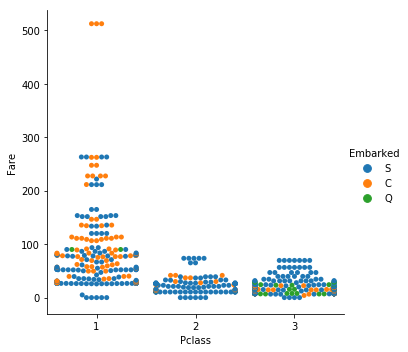

In [22]:
sns.catplot(x="Pclass", y="Fare",hue = "Embarked", kind="swarm", data=df_titanic_basedata_train_0);
# we can clearly see that majority of people who are from 'S' and 'Q' are in 2nd and 3rd class, also they are paying less fare.

In [34]:
df_titanic_basedata_test_1 = df_titanic_basedata_test_0

In [35]:
#So we will group by Pclass, Embarked, and Parch after which we will impute fare with median values of people having same values.
median_far = df_titanic_basedata_test_0.groupby(['Pclass','Embarked','Parch']).Fare.median()[3]['S'][0]
df_titanic_basedata_test_1['Fare'] = df_titanic_basedata_test_0['Fare'].fillna(median_far)
print(median_far)

7.925


In [29]:
median_far1 = df_titanic_basedata_test_0.groupby(['Pclass','Embarked','Parch']).Fare.median()
df_titanic_basedata_test_1['Fare'] = df_titanic_basedata_test_0['Fare'].fillna(median_far)
print(median_far1)

Pclass  Embarked  Parch
1       C         0         58.57500
                  1         83.15830
                  2        134.50000
                  3        262.37500
        Q         0         90.00000
        S         0         46.30000
                  1         81.85830
                  2        151.55000
                  4        263.00000
2       C         0         15.03330
                  1         37.00420
                  2         41.57920
        Q         0         11.52915
        S         0         13.00000
                  1         24.50000
                  2         34.62500
                  3         39.00000
3       C         0          7.22920
                  1         15.24580
                  2         11.23750
        Q         0          7.75000
                  1         29.12500
        S         0          7.92500
                  1         14.50000
                  2         22.01250
                  4         25.46670
              

Logarithm base 10 of 14 is : 1.146128035678238
2.621176281775035
9.707547608056666


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for mul

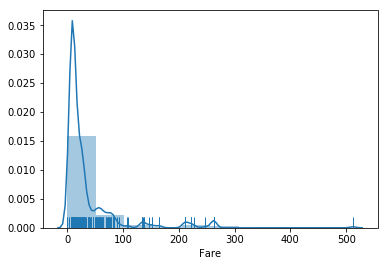

In [30]:
# Python code to demonstrate the working of
# log(a,Base)
import math
# Printing the log base 5 of 14
print ("Logarithm base 10 of 14 is : ", end="")
print (math.log10(14))
#length of train dataset
len(df_titanic_basedata_test_0)
#log of length
print (math.log10(len(df_titanic_basedata_test_0)))
# Struge formula
print(1 + 3.322*(math.log10(len(df_titanic_basedata_test_0))))
# round off the bin size
bin_size = round((1 + 3.322*(math.log10(len(df_titanic_basedata_test_0)))))

sns.distplot(df_titanic_basedata_train_0.Fare, bins = bin_size, hist = True, rug = True)
# number of bins are calculated as per Sturge’s rule K = 1 + 3. 322 logN

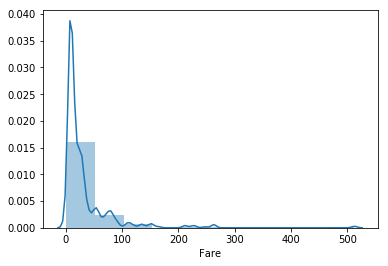

In [32]:

sns.distplot(df_titanic_basedata_train_0.Fare, bins = bin_size, hist = True)

In [41]:
# The above Graph will help us to deal with missing values in Embarked
df_titanic_basedata_train_0[df_titanic_basedata_train_0['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [37]:
# seeing the above graph we can impute these values by 'C'
df_titanic_basedata_train_0['Embarked'] = df_titanic_basedata_train_0['Embarked'].fillna('C')

In [42]:
# The above Graph will help us to deal with missing values in Embarked
df_titanic_basedata_train_0[df_titanic_basedata_train_0['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [44]:
# Let's deal With Age column Now
df_titanic_basedata_train_0[df_titanic_basedata_train_0['Age'].isnull()].head()
# As of now i'll impute age column with Median based on gender and check performance of the model and later on find a different strategy to deal with it.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [45]:
median_male_age = df_titanic_basedata_train_0.groupby(['Sex']).Age.median()['male']
median_male_age

median_female_age = df_titanic_basedata_train_0.groupby(['Sex']).Age.median()['female']
print(median_male_age)
print('*'*100)
print(median_female_age)

29.0
****************************************************************************************************
27.0


In [46]:
df_titanic_basedata_train_1 = df_titanic_basedata_train_0

In [52]:
copy = df_titanic_basedata_train_1.copy()

conditions = [copy['Sex'] == "male", copy['Sex'] == "female"]
values = [29.0, 27.0]

# apply logic where company_type is null
copy['Age'] = np.where(copy['Age'].isnull(),
                              np.select(conditions, values),
                              copy['Age'])

In [54]:
#let's apply above logic on Training_data and Test_data

conditions = [df_titanic_basedata_train_1['Sex'] == "male", df_titanic_basedata_train_1['Sex'] == "female"]
values = [29.0, 27.0]
# apply logic where company_type is null
df_titanic_basedata_train_1['Age'] = np.where(df_titanic_basedata_train_1['Age'].isnull(),
                              np.select(conditions, values),
                              df_titanic_basedata_train_1['Age'])

df_titanic_basedata_train_1.info()
# As we can see we are done with training data and now let's apply same logic on test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


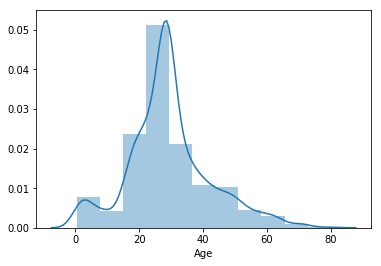

In [56]:
sns.distplot(df_titanic_basedata_train_0.Age, bins = round((1 + 3.322*(math.log10(len(df_titanic_basedata_train_0))))), hist = True)

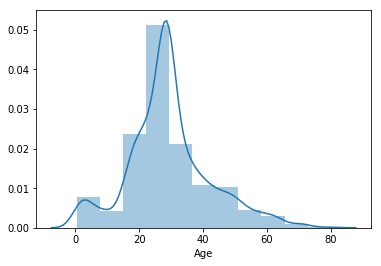

In [57]:
sns.distplot(df_titanic_basedata_train_1.Age, bins = round((1 + 3.322*(math.log10(len(df_titanic_basedata_train_1))))), hist = True)

In [59]:
df_titanic_basedata_train_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
# Test Data, first we need to find median for age column in test data

testing_male = df_titanic_basedata_test_1.groupby(['Sex']).Age.median()['male']

testing_female= df_titanic_basedata_test_1.groupby(['Sex']).Age.median()['female']
print(testing_male)
print('*'*100)
print(testing_female)

27.0
****************************************************************************************************
27.0


In [61]:
# since Median comes to same i'll apply same age to all missing values
df_titanic_basedata_test_1['Age'] = df_titanic_basedata_test_1['Age'].fillna(27)

In [62]:
## let's drop collumns which we won't we adding in our model
df_titanic_basedata_train_1 = df_titanic_basedata_train_1.drop('PassengerId', axis=1)
df_titanic_basedata_train_1 = df_titanic_basedata_train_1.drop('Cabin', axis=1)
df_titanic_basedata_train_1 = df_titanic_basedata_train_1.drop('Ticket', axis=1)

In [63]:
# Drop them from test data also
df_titanic_basedata_test_1.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
df_titanic_basedata_test_1 = df_titanic_basedata_test_1.drop('Ticket', axis=1)

In [64]:
##Create Dummy variables for categorical features

train_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in train_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_train_1[feature]).add_prefix(feature + '_')
    df_titanic_basedata_train_1 = df_titanic_basedata_train_1.join(dummies)

In [65]:
df_titanic_basedata_train_1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [66]:
# dummy variables are added

In [67]:
test_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in test_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_test_1[feature]).add_prefix(feature + '_')
    df_titanic_basedata_test_1 = df_titanic_basedata_test_1.join(dummies)
    
    
# Found this particular code from, source: https://www.kaggle.com/reighns/titanic-a-complete-beginner-s-guide

In [68]:
df_titanic_basedata_test_1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,0,1,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1,1,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,1,0,0,1,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,0,1,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,0,1,1,0,0,0,1


In [69]:
# let's drop useless features.
drop_column = ['Pclass','Name','Sex', 'Embarked']
df_titanic_basedata_train_1.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass','Name','Sex', 'Embarked']
df_titanic_basedata_test_1.drop(drop_column, axis=1, inplace = True)

In [73]:
df_titanic_basedata_test_1.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [74]:
df_titanic_basedata_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived      891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.8 KB


In [75]:
df_titanic_basedata_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Pclass_1      418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.4 KB


(13, 0)

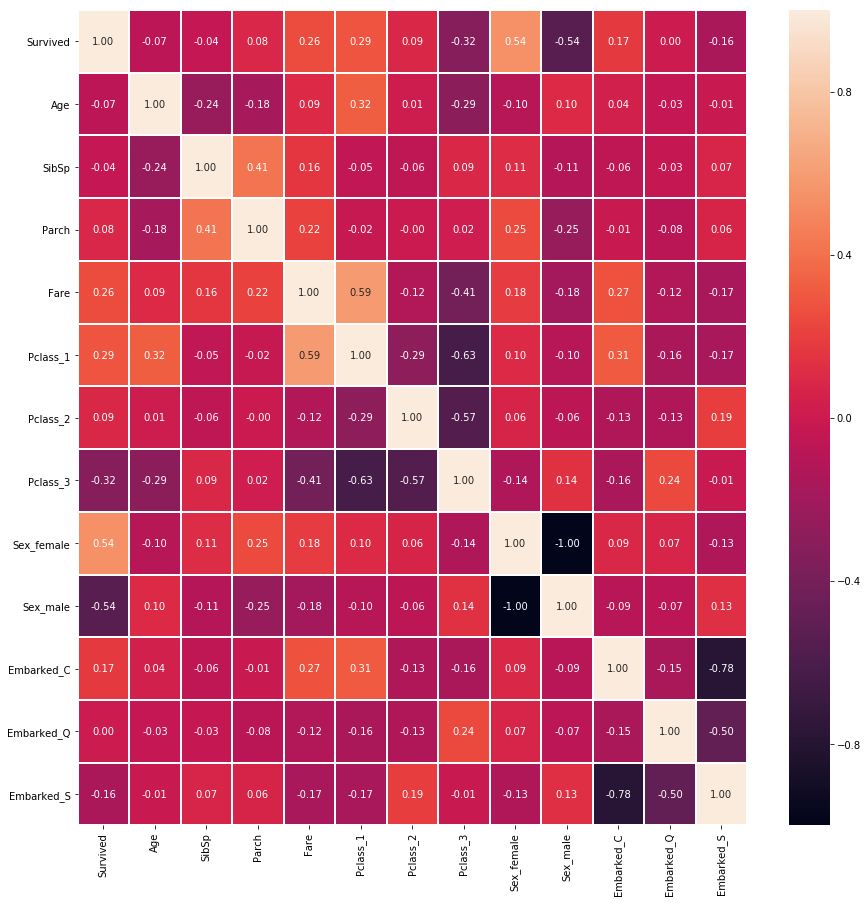

In [76]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_titanic_basedata_train_1.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
ax.set_ylim(13, 0)


In [77]:
#Now if we See Sex_Female and Sex_Male as 2 separate columns but logically:¶
#if value for female is 0 than it is male and if 1 than it is female so no need of 2 columns. Same logic can be applied to Embarked & Pclass. I'll drop extra columns.

In [78]:
drop_column = ['Pclass_3','Sex_male', 'Embarked_S']
df_titanic_basedata_train_1.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass_3','Sex_male', 'Embarked_S']
df_titanic_basedata_test_1.drop(drop_column, axis=1, inplace = True)

(10, 0)

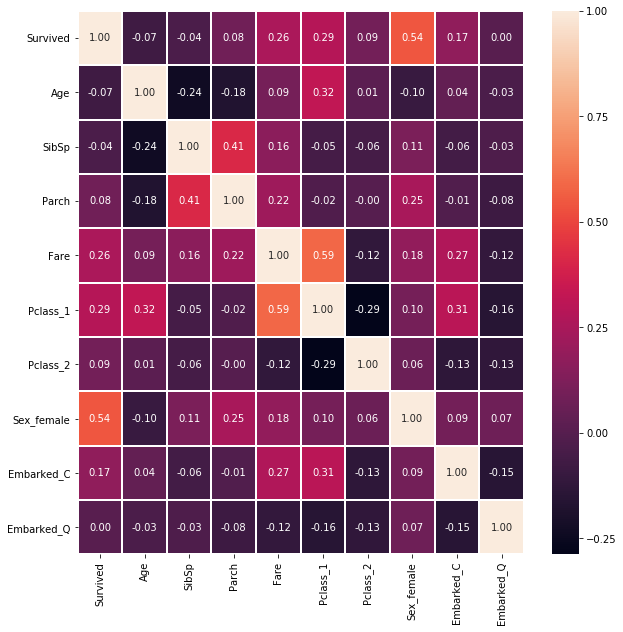

In [79]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_titanic_basedata_train_1.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
ax.set_ylim(10, 0)

In [31]:
# Imports
# Stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

In [82]:
df_titanic_basedata_train_2 = df_titanic_basedata_train_1.copy()

In [83]:
## Check Multicolinearity
x1 = sm.tools.add_constant(df_titanic_basedata_train_2)
series_before = pd.Series([variance_inflation_factor(x1.values, i)for i in range(x1.shape[1])], index = x1.columns)
display(series_before)

# the score for the independent features must be below 5 which shows there is no multicollinearity.
# link for more details, source: https://www.youtube.com/watch?v=8DhvVs59It4&list=PLcFcktZ0wnNkMqnUi8zUAPlO_swt-3GiJ&index=2

const         9.319735
Survived      1.662661
Age           1.267429
SibSp         1.300765
Parch         1.335141
Fare          1.767827
Pclass_1      2.201702
Pclass_2      1.231730
Sex_female    1.538633
Embarked_C    1.164393
Embarked_Q    1.112043
dtype: float64

In [84]:
#Let's Split our data
df_titanic_basedata_train_2_predictor = df_titanic_basedata_train_2.drop("Survived", axis=1)
df_titanic_basedata_train_2_target = df_titanic_basedata_train_2["Survived"]


In [85]:
print("Predictor Shape", df_titanic_basedata_train_2_predictor.shape)
print("Target Shape", df_titanic_basedata_train_2_target.shape)

Predictor Shape (891, 9)
Target Shape (891,)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    df_titanic_basedata_train_2_predictor, df_titanic_basedata_train_2_target, train_size=0.8, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


In [87]:
## We will be using standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)
## transforming "test_x"
X_test = sc.transform(X_test)

## transforming "The testset"
test_data = sc.transform(test_data)

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


NameError: name 'test_data' is not defined

In [88]:
## transforming "The testset"
df_titanic_basedata_test_1 = sc.transform(df_titanic_basedata_test_1)

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [89]:
## Lets call logistic regression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))



So, Our accuracy Score is: 0.80446927


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
# Let's predict survival for our Test_Data
testingonunknowndata = logreg.predict(df_titanic_basedata_test_1)

In [91]:
print(testingonunknowndata)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [92]:
#Let's Evaluate our model's performance:

In [93]:
# 1. Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,logreg.predict(X_test))
col=["Predicted Dead","Predicted Survived"]
cm=pd.DataFrame(cm)
cm.columns=["Predicted Dead","Predicted Survived"]
cm.index=["Actual Dead","Actual Survived"]
cm

,Predicted Dead,Predicted Survived
Actual Dead,93,17
Actual Survived,18,51


In [94]:
# 2. Classification report:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
classification_report(y_test, y_pred,target_names=target_names)
#The report shows the main classification metrics precision, recall and f1-score on a per-class basis.

# For detailed explanation visit, source: https://muthu.co/understanding-the-classification-report-in-sklearn/

'              precision    recall  f1-score   support\n\n     class 0       0.84      0.85      0.84       110\n     class 1       0.75      0.74      0.74        69\n\n   micro avg       0.80      0.80      0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [95]:
# A) Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

# B) Recall – What percent of your predictions were correct? Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

# C) F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Precision score: 0.75
Recall score: 0.7391304347826086
F1 Score: 0.7445255474452556


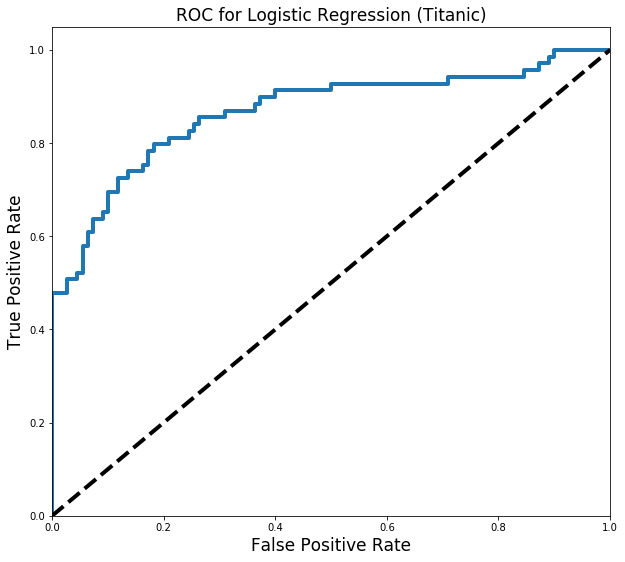

In [96]:
# Lets plot Roc-Curve of our model

from sklearn.metrics import roc_curve
y_pred_proba = logreg.decision_function(X_test) # because roc curve needs actual labels and predicted probabilities

FPR, TPR, THR = roc_curve(y_test, y_pred_proba)
#Next is draw roc graph.
plt.figure(figsize =[10,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)',linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.title('ROC for Logistic Regression (Titanic)', fontsize= 17)
plt.show()

# code Source: https://www.kaggle.com/reighns/titanic-a-complete-beginner-s-guide

In [97]:
# Lets check Roc-Auc(Area under Curve) score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8669301712779975

ASSUMPTION OF APPROPRIATE OUTCOME STRUCTURE
To begin, one of the main assumptions of logistic regression is the appropriate structure of the outcome variable. Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

ASSUMPTION OF OBSERVATION INDEPENDENCE
Logistic regression requires the observations to be independent of each other. In other words, the observations should not come from repeated measurements or matched data.

ASSUMPTION OF THE ABSENCE OF MULTICOLLINEARITY
Logistic regression requires there to be little or no multicollinearity among the independent variables. This means that the independent variables should not be too highly correlated with each other.

ASSUMPTION OF LINEARITY OF INDEPENDENT VARIABLES AND LOG ODDS
Logistic regression assumes linearity of independent variables and log odds. Although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

All our assumptions are met!

Source: https://www.lexjansen.com/wuss/2018/130_Final_Paper_PDF.pdf

In [98]:
file = cwd+'\\test.csv'
df_titanic_basedata_test_2 = pd.read_csv(file)

Logisticoutput = pd.DataFrame({"PassengerId": df_titanic_basedata_test_2.PassengerId, "Survived":testingonunknowndata})
Logisticoutput.PassengerId = Logisticoutput.PassengerId.astype(int)
Logisticoutput.Survived = Logisticoutput.Survived.astype(int)

Logisticoutput.to_csv("Logisticoutput.csv", index=False)
print("Your submission was successfully saved!")
Logisticoutput.head(10)

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [99]:
#Naive Bayes Model:

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
naivebayespred = gnb.predict(X_test)
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,naivebayespred),8)))

So, Our accuracy Score is: 0.7877095


## Let's Evaluate our model and compare it with Logistic Regression.

In [102]:
    # 1. Confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,logreg.predict(X_test))
col=["Predicted Dead","Predicted Survived"]
cm=pd.DataFrame(cm)
cm.columns=["Predicted Dead","Predicted Survived"]
cm.index=["Actual Dead","Actual Survived"]
print("Confusion Matrix: Lgistic Regression")
print(cm)

print('*' *100)

    # 2. Confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(y_test,gnb.predict(X_test))
col1=["Predicted Dead","Predicted Survived"]
cm1=pd.DataFrame(cm1)
cm1.columns=["Predicted Dead","Predicted Survived"]
cm1.index=["Actual Dead","Actual Survived"]
print("Confusion Matrix: Naive Bayes")
print(cm1)

Confusion Matrix: Lgistic Regression
                 Predicted Dead  Predicted Survived
Actual Dead                  93                  17
Actual Survived              18                  51
****************************************************************************************************
Confusion Matrix: Naive Bayes
                 Predicted Dead  Predicted Survived
Actual Dead                  87                  23
Actual Survived              15                  54


In [104]:
# 1. For logistic Regression:

# A) Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

# B) Recall – What percent of your predictions were correct? Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

# C) F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

print('-'*50)
    # 2. For Naive Bayes Regression:

# A) Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,naivebayespred)))

# B) Recall – What percent of your predictions were correct? Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,naivebayespred)))

# C) F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,naivebayespred)))


Precision score: 0.75
Recall score: 0.7391304347826086
F1 Score: 0.7445255474452556
--------------------------------------------------
Precision score: 0.7012987012987013
Recall score: 0.782608695652174
F1 Score: 0.7397260273972603


### Refrence: https://www.kaggle.com/rajkhona11/1stclassificationproject-titanic

In [105]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#X_train, X_test, y_train, y_test 

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)


Evaluating Model Performance

In [106]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8268156424581006
Precision: 0.8392857142857143
Recall: 0.6811594202898551


In [108]:
    # 3. Confusion matrix for Gradient Boosting
from sklearn.metrics import confusion_matrix

cm3=confusion_matrix(y_test,gb.predict(X_test))
col1=["Predicted Dead","Predicted Survived"]
cm3=pd.DataFrame(cm3)
cm3.columns=["Predicted Dead","Predicted Survived"]
cm3.index=["Actual Dead","Actual Survived"]
print("Confusion Matrix: Gradient Boosting")
print(cm3)

Confusion Matrix: Gradient Boosting
                 Predicted Dead  Predicted Survived
Actual Dead                 101                   9
Actual Survived              22                  47


In [109]:
# Let's predict survival for our Test_Data with GB
testingonunknowndata_gb = gb.predict(df_titanic_basedata_test_1)
print(testingonunknowndata_gb)

[0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [110]:
#file = cwd+'\\test.csv'
#df_titanic_basedata_test_2 = pd.read_csv(file)

GBoutput = pd.DataFrame({"PassengerId": df_titanic_basedata_test_2.PassengerId, "Survived":testingonunknowndata_gb})
GBoutput.PassengerId = GBoutput.PassengerId.astype(int)
GBoutput.Survived = GBoutput.Survived.astype(int)

GBoutput.to_csv("GBoutput.csv", index=False)
print("Your GB submission was successfully saved!")
GBoutput.head(10)

Your GB submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,1
9,901,0


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


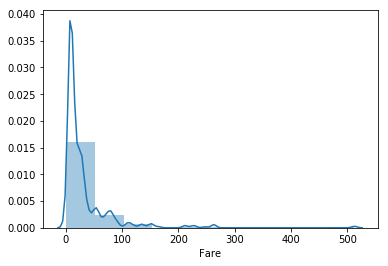

In [117]:
df_titanic_basedata_train_3 = df_titanic_basedata_train_0.copy()
df_titanic_basedata_test_3 = df_titanic_basedata_test_0.copy()

In [119]:
print(df_titanic_basedata_train_3.head())
print(df_titanic_basedata_test_3.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [120]:
#Impute Age

conditions = [df_titanic_basedata_train_3['Sex'] == "male", df_titanic_basedata_train_3['Sex'] == "female"]
values = [29.0, 27.0]
# apply logic where company_type is null
df_titanic_basedata_train_3['Age'] = np.where(df_titanic_basedata_train_3['Age'].isnull(),
                              np.select(conditions, values),
                              df_titanic_basedata_train_3['Age'])

# since Median comes to same i'll apply same age to all missing values
df_titanic_basedata_test_3['Age'] = df_titanic_basedata_test_3['Age'].fillna(27)

In [121]:
##Create Dummy variables for categorical features

## Train
train_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in train_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_train_3[feature]).add_prefix(feature + '_')
    df_titanic_basedata_train_3 = df_titanic_basedata_train_3.join(dummies)

    ## Test
test_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in test_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_test_3[feature]).add_prefix(feature + '_')
    df_titanic_basedata_test_3 = df_titanic_basedata_test_3.join(dummies)
   

In [123]:
df_titanic_basedata_train_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [132]:
##DROP features

## let's drop collumns which we won't we adding in our model
#df_titanic_basedata_train_3 = df_titanic_basedata_train_3.drop('PassengerId', axis=1)
#df_titanic_basedata_train_3 = df_titanic_basedata_train_3.drop('Cabin', axis=1)
#df_titanic_basedata_train_3 = df_titanic_basedata_train_3.drop('Ticket', axis=1)

# Drop them from test data also
#df_titanic_basedata_test_3.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
df_titanic_basedata_test_3 = df_titanic_basedata_test_3.drop('Ticket', axis=1)


# let's drop useless features.
drop_column = ['Pclass','Name','Sex', 'Embarked']
df_titanic_basedata_train_3.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass','Name','Sex', 'Embarked']
df_titanic_basedata_test_3.drop(drop_column, axis=1, inplace = True)



drop_column = ['Pclass_2','Sex_male', 'Embarked_Q']
df_titanic_basedata_train_3.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass_2','Sex_male', 'Embarked_Q']
df_titanic_basedata_test_3.drop(drop_column, axis=1, inplace = True)

In [134]:
df_titanic_basedata_train_3.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_3,Sex_female,Embarked_C,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,1,1,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1


In [135]:
df_titanic_basedata_test_3.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_3,Sex_female,Embarked_C,Embarked_S
0,34.5,0,0,7.8292,0,1,0,0,0
1,47.0,1,0,7.0000,0,1,1,0,1
2,62.0,0,0,9.6875,0,0,0,0,0
3,27.0,0,0,8.6625,0,1,0,0,1
4,22.0,1,1,12.2875,0,1,1,0,1


(10, 0)

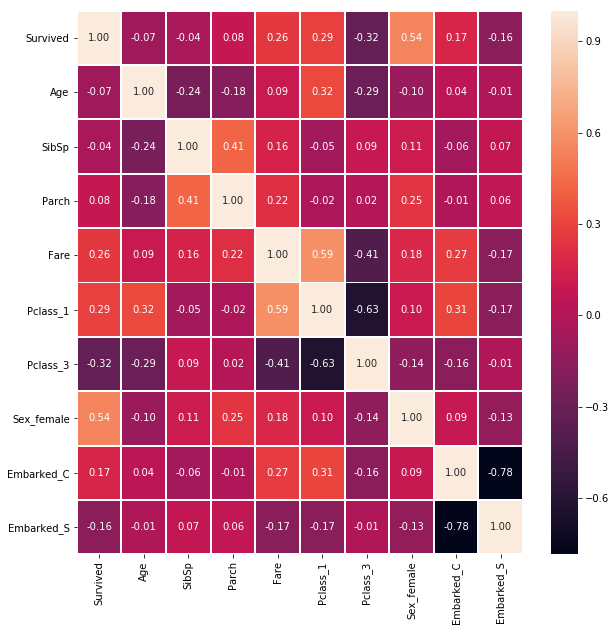

In [136]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_titanic_basedata_train_3.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
ax.set_ylim(10, 0)

In [137]:
#Let's Split our data
df_titanic_basedata_train_3_predictor = df_titanic_basedata_train_3.drop("Survived", axis=1)
df_titanic_basedata_train_3_target = df_titanic_basedata_train_3["Survived"]

print("Predictor Shape", df_titanic_basedata_train_3_predictor.shape)
print("Target Shape", df_titanic_basedata_train_3_target.shape)

X_train, X_test, y_train, y_test = train_test_split(
    df_titanic_basedata_train_3_predictor, df_titanic_basedata_train_3_target, train_size=0.8, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)




Predictor Shape (891, 9)
Target Shape (891,)
(712, 9) (712,)
(179, 9) (179,)


In [138]:
## We will be using standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)
## transforming "test_x"
X_test = sc.transform(X_test)



## transforming "The testset"
df_titanic_basedata_test_3 = sc.transform(df_titanic_basedata_test_3)

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


NameError: name 'test_data' is not defined

In [145]:
## transforming "The testset"
df_titanic_basedata_test_3 = sc.transform(df_titanic_basedata_test_3)

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [146]:
df_titanic_basedata_test_3

array([[ 0.38433313, -0.46445234, -0.47741019, ..., -0.72882288,
        -0.47484031, -1.62827579],
       [ 1.33859868,  0.41270964, -0.47741019, ...,  1.37207547,
        -0.47484031,  0.61414657],
       [ 2.48371735, -0.46445234, -0.47741019, ..., -0.72882288,
        -0.47484031, -1.62827579],
       ...,
       [ 0.68969811, -0.46445234, -0.47741019, ..., -0.72882288,
        -0.47484031,  0.61414657],
       [-0.1882262 , -0.46445234, -0.47741019, ..., -0.72882288,
        -0.47484031,  0.61414657],
       [-0.1882262 ,  0.41270964,  0.74092692, ..., -0.72882288,
         2.10597115, -1.62827579]])

In [147]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(712, 9) (712,)
(179, 9) (179,)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [149]:

#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#X_train, X_test, y_train, y_test 

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gb = gb.predict(X_test)

## Evaluate
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gb))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred_gb))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred_gb))

# 3. Confusion matrix for Gradient Boosting
from sklearn.metrics import confusion_matrix

cm3=confusion_matrix(y_test,gb.predict(X_test))
col1=["Predicted Dead","Predicted Survived"]
cm3=pd.DataFrame(cm3)
cm3.columns=["Predicted Dead","Predicted Survived"]
cm3.index=["Actual Dead","Actual Survived"]
print("Confusion Matrix: Gradient Boosting")
print(cm3)



Accuracy: 0.8268156424581006
Precision: 0.8653846153846154
Recall: 0.6521739130434783
Confusion Matrix: Gradient Boosting
                 Predicted Dead  Predicted Survived
Actual Dead                 103                   7
Actual Survived              24                  45


In [150]:

# Let's predict survival for our Test_Data with GB
testingonunknowndata_gb = gb.predict(df_titanic_basedata_test_3)
print(testingonunknowndata_gb)

GBoutput = pd.DataFrame({"PassengerId": df_titanic_basedata_test_2.PassengerId, "Survived":testingonunknowndata_gb})
GBoutput.PassengerId = GBoutput.PassengerId.astype(int)
GBoutput.Survived = GBoutput.Survived.astype(int)

GBoutput.to_csv("GBoutput_2.csv", index=False)
print("Your GB submission was successfully saved!")
GBoutput.head(10)

[0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
Your GB submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,1
9,901,0


In [155]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split


#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)


LR [0.78089888 0.81460674]
NB [0.71629213 0.78370787]
RF [0.76404494 0.78932584]
SVC [0.82022472 0.8005618 ]
Dtree [0.75280899 0.77808989]
XGB [0.78089888 0.80898876]
KNN [0.80337079 0.79494382]


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kvibhaas\

In [177]:
df_titanic_basedata_train_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#from scipy import stats
fare_mean = df_titanic_basedata_train_3['Fare'].mean()
fare_std = df_titanic_basedata_train_3['Fare'].std()
outlier_limit = fare_mean + 3*fare_std
print(outlier_limit)
outlier = df_titanic_basedata_train_3[df_titanic_basedata_train_3['Fare'] > outlier_limit]
print(outlier)

NameError: name 'df_titanic_basedata_train_3' is not defined

In [172]:
outlier = df_titanic_basedata_train_3[df_titanic_basedata_train_3['Fare'] > outlier_limit]
print(outlier)

     Survived   Age  SibSp  Parch      Fare  Pclass_1  Pclass_3  Sex_female  \
27          0  19.0      3      2  263.0000         1         0           0   
88          1  23.0      3      2  263.0000         1         0           1   
118         0  24.0      0      1  247.5208         1         0           0   
258         1  35.0      0      0  512.3292         1         0           1   
299         1  50.0      0      1  247.5208         1         0           1   
311         1  18.0      2      2  262.3750         1         0           1   
341         1  24.0      3      2  263.0000         1         0           1   
377         0  27.0      0      2  211.5000         1         0           0   
380         1  42.0      0      0  227.5250         1         0           1   
438         0  64.0      1      4  263.0000         1         0           0   
527         0  29.0      0      0  221.7792         1         0           0   
557         0  29.0      0      0  227.5250         

In [174]:
# Convert the running list of user ratings into a matrix using the 'pivot table' function
fare_class_mean = pd.pivot_table(df_titanic_basedata_train_3, index='Pclass_1', columns='Fare', aggfunc=np.mean)
print(fare_class_mean)

              Age                                                        \
Fare     0.0000   4.0125   5.0000   6.2375   6.4375   6.4500   6.4958     
Pclass_1                                                                  
0            30.3     20.0      NaN     61.0     34.5     43.0     26.0   
1            35.0      NaN     33.0      NaN      NaN      NaN      NaN   

                                      ...     Survived                    \
Fare     6.7500   6.8583   6.9500     ...     153.4625 164.8667 211.3375   
Pclass_1                              ...                                  
0            18.5     29.0     29.0   ...          NaN      NaN      NaN   
1             NaN      NaN      NaN   ...     0.666667      1.0      1.0   

                                                                         
Fare     211.5000 221.7792 227.5250 247.5208 262.3750 263.0000 512.3292  
Pclass_1                                                                 
0             NaN    

In [182]:
Pclass = df_titanic_basedata_train_0[df_titanic_basedata_train_0.Pclass == 1].groupby('Pclass')
Pclass.mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.62963,36.867685,0.416667,0.356481,84.154687


In [188]:
Pclass_1_mean = df_titanic_basedata_train_0[df_titanic_basedata_train_0.Pclass == 1].Fare.mean()
Pclass_1_std = df_titanic_basedata_train_0[df_titanic_basedata_train_0.Pclass == 1].Fare.std()

In [190]:
outlier_limit = Pclass_1_mean + 3*Pclass_1_std
print(outlier_limit)

319.2958054401864


In [191]:
outlier_dataset = df_titanic_basedata_train_3[df_titanic_basedata_train_3['Fare'] > outlier_limit]
print(outlier_dataset)

     Survived   Age  SibSp  Parch      Fare  Pclass_1  Pclass_3  Sex_female  \
258         1  35.0      0      0  512.3292         1         0           1   
679         1  36.0      0      1  512.3292         1         0           0   
737         1  35.0      0      0  512.3292         1         0           0   

     Embarked_C  Embarked_S  
258           1           0  
679           1           0  
737           1           0  


In [192]:
df_titanic_basedata_train_4 = df_titanic_basedata_train_3.copy()

In [196]:
#let's apply above logic on Training_data and Test_data

conditions = [df_titanic_basedata_train_4['Pclass_1'] == 1]
values = [319]
# apply logic where company_type is null
df_titanic_basedata_train_4['Fare'] = np.where(df_titanic_basedata_train_4['Fare'] > outlier_limit,
                              np.select(conditions, values),
                              df_titanic_basedata_train_1['Fare'])



In [202]:
outlier_dataset = df_titanic_basedata_train_4[df_titanic_basedata_train_4['Fare'] > 260]
print(outlier_dataset)

     Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_3  Sex_female  \
27          0  19.0      3      2  263.000         1         0           0   
88          1  23.0      3      2  263.000         1         0           1   
258         1  35.0      0      0  319.000         1         0           1   
311         1  18.0      2      2  262.375         1         0           1   
341         1  24.0      3      2  263.000         1         0           1   
438         0  64.0      1      4  263.000         1         0           0   
679         1  36.0      0      1  319.000         1         0           0   
737         1  35.0      0      0  319.000         1         0           0   
742         1  21.0      2      2  262.375         1         0           1   

     Embarked_C  Embarked_S  
27            0           1  
88            0           1  
258           1           0  
311           1           0  
341           0           1  
438           0           1  
679      

In [203]:
df_titanic_basedata_train_4.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_3,Sex_female,Embarked_C,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,1,1,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1


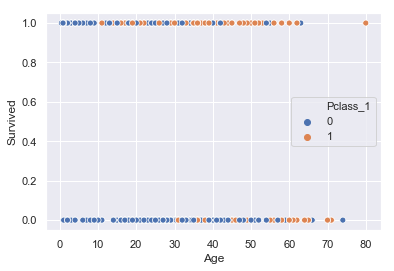

In [211]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Age", y="Survived", hue="Pclass_1", data=df_titanic_basedata_train_4)

### Attempt 3

In [8]:
df_titanic_basedata_train_4 = df_titanic_basedata_train_0.copy()
df_titanic_basedata_test_4 = df_titanic_basedata_test_0.copy()
df_titanic_basedata_train_4.head()
#df_titanic_basedata_test_4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_titanic_basedata_test_4.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [241]:

#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_titanic_basedata_train_0, title='Pandas Profiling Report', style={'full_width':True})

In [10]:

#Impute Age

conditions = [df_titanic_basedata_train_4['Sex'] == "male", df_titanic_basedata_train_4['Sex'] == "female"]
values = [29.0, 27.0]
# apply logic where company_type is null
df_titanic_basedata_train_4['Age'] = np.where(df_titanic_basedata_train_4['Age'].isnull(),
                              np.select(conditions, values),
                              df_titanic_basedata_train_4['Age'])

# since Median comes to same i'll apply same age to all missing values
df_titanic_basedata_test_4['Age'] = df_titanic_basedata_test_4['Age'].fillna(27)

In [14]:
# Treat Outlier with 3rd Quartile value
#from scipy import stats
fare_mean = df_titanic_basedata_train_4['Fare'].mean()
fare_std = df_titanic_basedata_train_4['Fare'].std()
outlier_limit = fare_mean + 3*fare_std
print(outlier_limit)

outlier = df_titanic_basedata_train_4[df_titanic_basedata_train_4['Fare'] > outlier_limit]
print(outlier)


conditions = [df_titanic_basedata_train_4['Pclass'] == 1]
values = [319]
# apply logic where company_type is null
df_titanic_basedata_train_4['Fare'] = np.where(df_titanic_basedata_train_4['Fare'] > outlier_limit,
                              np.select(conditions, values),
                              df_titanic_basedata_train_4['Fare'])


181.2844937601173
     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   

                                                  Name     Sex   Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
88                       

In [15]:
df_titanic_basedata_train_4.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.441268,0.523008,0.381594,33.095150
std,257.353842,0.486592,0.836071,13.018747,1.102743,0.806057,52.165132
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,319.000000


In [16]:
##Create Dummy variables for categorical features

## Train
train_categorical_features = [ 'Sex', 'Embarked']
for feature in train_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_train_4[feature]).add_prefix(feature + '_')
    df_titanic_basedata_train_4 = df_titanic_basedata_train_4.join(dummies)




    ## Test
test_categorical_features = [ 'Sex', 'Embarked']
for feature in test_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_test_4[feature]).add_prefix(feature + '_')
    df_titanic_basedata_test_4 = df_titanic_basedata_test_4.join(dummies)  

In [17]:
df_titanic_basedata_train_4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [18]:
df_titanic_basedata_test_4.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,0,1


In [19]:
   
##DROP features

## let's drop collumns which we won't we adding in our model
df_titanic_basedata_train_4 = df_titanic_basedata_train_4.drop('PassengerId', axis=1)
df_titanic_basedata_train_4 = df_titanic_basedata_train_4.drop('Cabin', axis=1)
df_titanic_basedata_train_4 = df_titanic_basedata_train_4.drop('Ticket', axis=1)
df_titanic_basedata_train_4 = df_titanic_basedata_train_4.drop('Name', axis=1)


# Drop them from test data also
#df_titanic_basedata_test_4.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

df_titanic_basedata_test_4 = df_titanic_basedata_test_4.drop('PassengerId', axis=1)
df_titanic_basedata_test_4 = df_titanic_basedata_test_4.drop('Cabin', axis=1)
df_titanic_basedata_test_4 = df_titanic_basedata_test_4.drop('Ticket', axis=1)
df_titanic_basedata_test_4 = df_titanic_basedata_test_4.drop('Name', axis=1)


In [20]:
df_titanic_basedata_test_4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,3,female,47.0,1,0,7.0000,S,1,0,0,0,1
2,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,3,male,27.0,0,0,8.6625,S,0,1,0,0,1
4,3,female,22.0,1,1,12.2875,S,1,0,0,0,1


In [21]:
df_titanic_basedata_test_4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,3,female,47.0,1,0,7.0000,S,1,0,0,0,1
2,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,3,male,27.0,0,0,8.6625,S,0,1,0,0,1
4,3,female,22.0,1,1,12.2875,S,1,0,0,0,1


In [22]:

# let's drop useless features.
drop_column = ['Sex', 'Embarked']
df_titanic_basedata_train_4.drop(drop_column, axis=1, inplace = True)

drop_column = ['Sex', 'Embarked']
df_titanic_basedata_test_4.drop(drop_column, axis=1, inplace = True)



drop_column = ['Sex_male', 'Embarked_Q']
df_titanic_basedata_train_4.drop(drop_column, axis=1, inplace = True)

drop_column = ['Sex_male', 'Embarked_Q']
df_titanic_basedata_test_4.drop(drop_column, axis=1, inplace = True)

In [23]:
df_titanic_basedata_train_4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


In [30]:
df_titanic_basedata_train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
FamilySize    891 non-null int64
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


In [24]:
df_titanic_basedata_train_4['FamilySize'] = df_titanic_basedata_train_4['SibSp'] + df_titanic_basedata_train_4['Parch'] + 1

In [25]:
df_titanic_basedata_test_4['FamilySize'] = df_titanic_basedata_test_4['SibSp'] + df_titanic_basedata_test_4['Parch'] + 1

In [26]:
df_titanic_basedata_train_4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_S,FamilySize
0,0,3,22.0,1,0,7.2500,0,0,1,2
1,1,1,38.0,1,0,71.2833,1,1,0,2
2,1,3,26.0,0,0,7.9250,1,0,1,1
3,1,1,35.0,1,0,53.1000,1,0,1,2
4,0,3,35.0,0,0,8.0500,0,0,1,1


(10, 0)

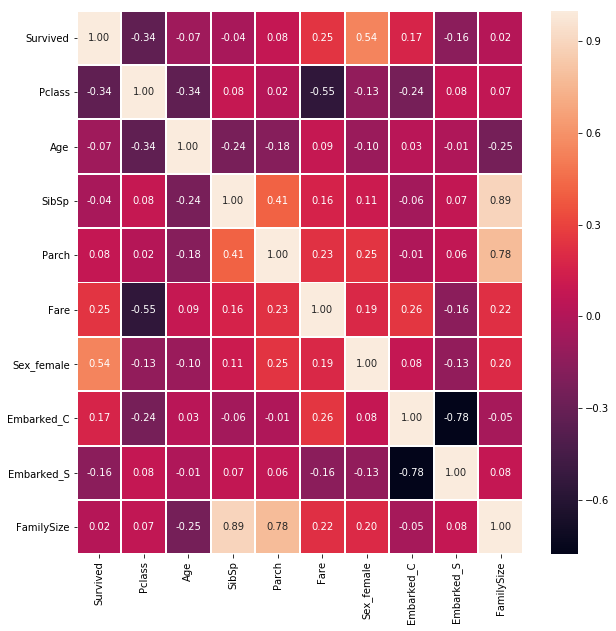

In [27]:

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_titanic_basedata_train_4.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
ax.set_ylim(10, 0)

In [32]:
#Let's Split our data
df_titanic_basedata_train_4_predictor = df_titanic_basedata_train_4.drop("Survived", axis=1)
df_titanic_basedata_train_4_target = df_titanic_basedata_train_4["Survived"]

print("Predictor Shape", df_titanic_basedata_train_4_predictor.shape)
print("Target Shape", df_titanic_basedata_train_4_target.shape)

X_train, X_test, y_train, y_test = train_test_split(
    df_titanic_basedata_train_4_predictor, df_titanic_basedata_train_4_target, train_size=0.8, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


Predictor Shape (891, 9)
Target Shape (891,)
(712, 9) (712,)
(179, 9) (179,)


In [ ]:
## We will be using standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)
## transforming "test_x"
X_test = sc.transform(X_test)



## transforming "The testset"
df_titanic_basedata_test_4 = sc.transform(df_titanic_basedata_test_4)

In [33]:
##Model

#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#X_train, X_test, y_train, y_test 

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gb = gb.predict(X_test)

## Evaluate
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gb))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred_gb))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred_gb))

# 3. Confusion matrix for Gradient Boosting
from sklearn.metrics import confusion_matrix

cm3=confusion_matrix(y_test,gb.predict(X_test))
col1=["Predicted Dead","Predicted Survived"]
cm3=pd.DataFrame(cm3)
cm3.columns=["Predicted Dead","Predicted Survived"]
cm3.index=["Actual Dead","Actual Survived"]
print("Confusion Matrix: Gradient Boosting")
print(cm3)

Accuracy: 0.8435754189944135
Precision: 0.8867924528301887
Recall: 0.6811594202898551
Confusion Matrix: Gradient Boosting
                 Predicted Dead  Predicted Survived
Actual Dead                 104                   6
Actual Survived              22                  47


In [39]:
df_titanic_basedata_test_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_female    418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_S    418 non-null uint8
FamilySize    418 non-null int64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [42]:
#So we will group by Pclass, Embarked, and Parch after which we will impute fare with median values of people having same values.
median_far = df_titanic_basedata_test_4.groupby(['Pclass','Embarked_S','Parch']).Fare.median()[3][1][0]
df_titanic_basedata_test_4['Fare'] = df_titanic_basedata_test_4['Fare'].fillna(median_far)
print(median_far)

7.925


In [43]:
# Let's predict survival for our Test_Data with GB
testingonunknowndata_gb2 = gb.predict(df_titanic_basedata_test_4)
print(testingonunknowndata_gb2)



[0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [44]:

file = cwd+'\\test.csv'
df_titanic_basedata_test_2 = pd.read_csv(file)

GBoutput = pd.DataFrame({"PassengerId": df_titanic_basedata_test_2.PassengerId, "Survived":testingonunknowndata_gb2})
GBoutput.PassengerId = GBoutput.PassengerId.astype(int)
GBoutput.Survived = GBoutput.Survived.astype(int)

GBoutput.to_csv("GBoutput_3.csv", index=False)
print("Your GB3 submission was successfully saved!")
GBoutput.head(10)

Your GB3 submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,1
9,901,0


In [34]:
print(file)

C:\Vibhaas\personal\Data Science Study\Projects\Kaggle\Titanic\Attempt 2\Dataset\test.csv


## Attempt 4

In [27]:
df_titanic_basedata_train_5 = df_titanic_basedata_train_0.copy()
df_titanic_basedata_test_5 = df_titanic_basedata_test_0.copy()


In [28]:
#df_titanic_basedata_train_5.head()
df_titanic_basedata_test_5.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
#Impute Age

conditions = [df_titanic_basedata_train_5['Sex'] == "male", df_titanic_basedata_train_5['Sex'] == "female"]
values = [29.0, 27.0]
# apply logic where company_type is null
df_titanic_basedata_train_5['Age'] = np.where(df_titanic_basedata_train_5['Age'].isnull(),
                              np.select(conditions, values),
                              df_titanic_basedata_train_5['Age'])

# since Median comes to same i'll apply same age to all missing values
df_titanic_basedata_test_5['Age'] = df_titanic_basedata_test_5['Age'].fillna(27)

# Impute Embark
# seeing the above graph we can impute these values by 'C'
df_titanic_basedata_train_5['Embarked'] = df_titanic_basedata_train_5['Embarked'].fillna('C')


## Impute Fare in Test
#So we will group by Pclass, Embarked, and Parch after which we will impute fare with median values of people having same values.
median_test_fare = df_titanic_basedata_test_5.groupby(['Pclass','Embarked','Parch']).Fare.median()[3]['S'][0]
df_titanic_basedata_test_5['Fare'] = df_titanic_basedata_test_5['Fare'].fillna(median_test_fare)
print(median_test_fare)


7.925


In [90]:
df_titanic_basedata_test_5.info()
## 2 values in embarked as null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
FamilySize     418 non-null int64
dtypes: float64(2), int64(5), object(5), uint8(8)
memory usage: 42.5+ KB


In [33]:
# Treat Outlier with 3rd Quartile value
#from scipy import stats
#fare_mean = df_titanic_basedata_train_5['Fare'].mean()
#fare_std = df_titanic_basedata_train_5['Fare'].std()
#outlier_limit = fare_mean + 3*fare_std
#print(outlier_limit)

#outlier = df_titanic_basedata_train_5[df_titanic_basedata_train_5['Fare'] > outlier_limit]
#print(outlier)


conditions = [df_titanic_basedata_train_5['Pclass'] == 1]
values = [319]
# apply logic where company_type is null
df_titanic_basedata_train_5['Fare'] = np.where(df_titanic_basedata_train_5['Fare'] > 500,
                              np.select(conditions, values),
                              df_titanic_basedata_train_5['Fare'])


In [34]:
df_titanic_basedata_train_5.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.441268,0.523008,0.381594,31.553268
std,257.353842,0.486592,0.836071,13.018747,1.102743,0.806057,44.376032
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,319.000000


In [35]:
outlier = df_titanic_basedata_test_5[df_titanic_basedata_test_5['Fare'] > outlier_limit]
print(outlier)

     PassengerId  Pclass                                               Name  \
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
53           945       1                         Fortune, Miss. Ethel Flora   
59           951       1                        Chaudanson, Miss. Victorine   
64           956       1                        Ryerson, Master. John Borie   
69           961       1                Fortune, Mrs. Mark (Mary McDougald)   
74           966       1                               Geiger, Miss. Amalie   
75           967       1                                 Keeping, Mr. Edwin   
81           973       1                                 Straus, Mr. Isidor   
114         1006       1             Straus, Mrs. Isidor (Rosalie Ida Blun)   
142         1034       1                         Ryerson, Mr. Arthur Larned   
156         1048       1                                  Bird, Miss. Ellen   
184         1076       1  Douglas, Mrs. Frederick Ch

In [36]:
conditions = [df_titanic_basedata_test_5['Pclass'] == 1]
values = [319]
# apply logic where company_type is null
df_titanic_basedata_test_5['Fare'] = np.where(df_titanic_basedata_test_5['Fare'] > 500,
                              np.select(conditions, values),
                              df_titanic_basedata_test_5['Fare'])


In [37]:
df_titanic_basedata_test_5.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.098405
std,120.810458,0.841838,12.703770,0.896760,0.981429,52.605477
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,319.000000


In [38]:
df_titanic_basedata_train_5.head()
#df_titanic_basedata_test_5.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
##Create Dummy variables for categorical features

## Train
train_categorical_features = [ 'Pclass','Sex', 'Embarked']
for feature in train_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_train_5[feature]).add_prefix(feature + '_')
    df_titanic_basedata_train_5 = df_titanic_basedata_train_5.join(dummies)




    ## Test
test_categorical_features = [ 'Pclass','Sex', 'Embarked']
for feature in test_categorical_features:
    dummies = pd.get_dummies(df_titanic_basedata_test_5[feature]).add_prefix(feature + '_')
    df_titanic_basedata_test_5 = df_titanic_basedata_test_5.join(dummies)  

In [41]:
df_titanic_basedata_train_5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [42]:
# Add Family size
df_titanic_basedata_train_5['FamilySize'] = df_titanic_basedata_train_5['SibSp'] + df_titanic_basedata_train_5['Parch'] + 1

df_titanic_basedata_test_5['FamilySize'] = df_titanic_basedata_test_5['SibSp'] + df_titanic_basedata_test_5['Parch'] + 1

In [43]:
df_titanic_basedata_train_5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,0,0,1,0,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,0,1,1


In [44]:
df_titanic_basedata_train_6 = df_titanic_basedata_train_5.copy()
df_titanic_basedata_test_6 = df_titanic_basedata_test_5.copy()


In [46]:
df_titanic_basedata_test_6.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1,3


In [47]:
   
##DROP features -  Identifiers

## let's drop collumns which we won't we adding in our model
df_titanic_basedata_train_6 = df_titanic_basedata_train_6.drop('PassengerId', axis=1)
df_titanic_basedata_train_6 = df_titanic_basedata_train_6.drop('Cabin', axis=1)
df_titanic_basedata_train_6 = df_titanic_basedata_train_6.drop('Ticket', axis=1)
df_titanic_basedata_train_6 = df_titanic_basedata_train_6.drop('Name', axis=1)


# Drop them from test data also
df_titanic_basedata_test_6 = df_titanic_basedata_test_6.drop('PassengerId', axis=1)
df_titanic_basedata_test_6 = df_titanic_basedata_test_6.drop('Cabin', axis=1)
df_titanic_basedata_test_6 = df_titanic_basedata_test_6.drop('Ticket', axis=1)
df_titanic_basedata_test_6 = df_titanic_basedata_test_6.drop('Name', axis=1)


In [48]:
##DROP features -  Categorical
# not dropping Pclass as I wan to use it as ordinal data

# let's drop useless features.
drop_column = ['Sex', 'Embarked']
df_titanic_basedata_train_6.drop(drop_column, axis=1, inplace = True)

drop_column = ['Sex', 'Embarked']
df_titanic_basedata_test_6.drop(drop_column, axis=1, inplace = True)



In [51]:
df_titanic_basedata_test_6.head()

,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,34.5,0,0,7.8292,0,0,1,0,1,0,1,0,1
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1,2
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,1
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,1
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1,3


In [ ]:
# Data is ready for model and feature selection. 
# All feautres are numeric

In [98]:
# Import the linear_model and roc_auc_score modules
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

# define auc function
def auc(variables, target, basetable):
    predictions = 0 # reset the value
    auc= 0 # reset the value
    
    X = basetable[variables]
    Y = basetable[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, Y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)


In [73]:
auc = auc(["Pclass","Age","SibSp","Parch","Fare","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S","FamilySize"],["Survived"],df_titanic_basedata_train_6)
print(round(auc,2))

TypeError: 'numpy.float64' object is not callable

In [ ]:
"Pclass","Age","SibSp","Parch","Fare","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S","FamilySize"

In [99]:
def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    
	# Calculate the auc score of adding v to the current variables
    for v in candidate_variables:
        auc_v = auc(current_variables + [v],target, basetable)
        
		# Update best_auc and best_variable adding v led to a better auc score
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
            
    return best_variable
  

In [80]:
next_variable = next_best(["Pclass","Age","Fare","Sex_male","Embarked_C","Embarked_Q","Embarked_S","FamilySize", "SibSp"], ["Parch","Pclass_1","Pclass_2","Pclass_3","Sex_female"], ["Survived"], df_titanic_basedata_train_6)
print(next_variable)
print(best_auc)

Sex_female


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

NameError: name 'best_auc' is not defined

In [86]:
current_variables = ["Pclass","Age","Fare","Sex_male","Embarked_C","Embarked_Q","Embarked_S","FamilySize", "SibSp"]
candidate_variables = ["Parch","Pclass_1","Pclass_2","Pclass_3","Sex_female"]
#basetable = df_titanic_basedata_train_6

next_variable = next_best(current_variables, candidate_variables, df_titanic_basedata_train_6)
print(next_variable)

TypeError: next_best() missing 1 required positional argument: 'basetable'

In [100]:
candidate_variables = ["Pclass","Age","Fare","Sex_male","Embarked_C","Embarked_Q","Embarked_S","FamilySize", "SibSp","Parch","Pclass_1","Pclass_2","Pclass_3","Sex_female"]
current_variables = []
target = ["Survived"]

max_number_variables = 8
number_iterations = min(max_number_variables, len(candidate_variables))

for i in range(0,number_iterations):
    
    next_variable = next_best(current_variables,candidate_variables,target,df_titanic_basedata_train_6)
    
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)

print(current_variables)



C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

['Sex_female', 'Pclass', 'Age', 'SibSp', 'Embarked_C', 'Fare', 'Sex_male', 'Pclass_1']


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [101]:
auc = auc(current_variables,["Survived"],df_titanic_basedata_train_6)
print(round(auc,2))

0.86


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
# Import the GB and accuracy modules
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

# define auc function
def gbacc(variables, target, basetable):
    predictions = 0 # reset the value
    auc= 0 # reset the value
    
    X = basetable[variables]
    Y = basetable[target]
    #Create Gradient Boosting Classifier
    gb = GradientBoostingClassifier()
    gb.fit(X, Y)
    predictions = gb.predict(X)
    gb_acc = metrics.accuracy_score(Y, predictions)
    return(gb_acc)


In [112]:
gb_acc = gbacc(["Sex_female", "Pclass", "Age", "SibSp", "Embarked_C", "Fare", "Sex_male", "Pclass_1"],["Survived"],df_titanic_basedata_train_6)
print(round(gb_acc,2))

0.9


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
def next_best_v(current_variables,candidate_variables, target, basetable):
    best_gbacc = -1
    best_variable = None
    
	# Calculate the auc score of adding v to the current variables
    for v in candidate_variables:
        gbacc_v = gbacc(current_variables + [v],target, basetable)
        
		# Update best_auc and best_variable adding v led to a better auc score
        if gbacc_v >= best_gbacc:
            best_gbacc = gbacc_v
            best_variable = v
            
    return best_variable
  

In [119]:
next_variable = next_best_v(["Pclass","Age","Fare","Sex_male","Embarked_C","Embarked_Q","Embarked_S","FamilySize", "SibSp"], ["Parch","Pclass_1","Pclass_2","Pclass_3","Sex_female"], ["Survived"], df_titanic_basedata_train_6)
print(next_variable)

C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pclass_2


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
candidate_variables = ["Pclass","Age","Fare","Sex_male","Embarked_C","Embarked_Q","Embarked_S","FamilySize", "SibSp","Parch","Pclass_1","Pclass_2","Pclass_3","Sex_female"]
current_variables = []
target = ["Survived"]

max_number_variables = 8
number_iterations = min(max_number_variables, len(candidate_variables))

for i in range(0,number_iterations):
    
    next_variable = next_best_v(current_variables,candidate_variables,target,df_titanic_basedata_train_6)
    
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)

print(current_variables)



C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

['Sex_female', 'Fare', 'Age', 'FamilySize', 'Pclass', 'Pclass_3', 'Pclass_1', 'Sex_male']


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
#['Sex_female', 'Fare', 'Age', 'FamilySize', 'Pclass', 'Pclass_3', 'Pclass_1', 'Sex_male']

gb_acc = gbacc(["Sex_female","Fare","Age","FamilySize", "Pclass", "Pclass_3", "Pclass_1", "Sex_male"],["Survived"],df_titanic_basedata_train_6)
print(round(gb_acc,2))


0.9


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
df_titanic_basedata_train_7 = df_titanic_basedata_train_6[['Sex_female','Fare','Age','FamilySize', 'Pclass', 'Pclass_3', 'Pclass_1', 'Sex_male', 'Survived']]

In [125]:
df_titanic_basedata_train_7.head()

,Sex_female,Fare,Age,FamilySize,Pclass,Pclass_3,Pclass_1,Sex_male,Survived
0,0,7.2500,22.0,2,3,1,0,1,0
1,1,71.2833,38.0,2,1,0,1,0,1
2,1,7.9250,26.0,1,3,1,0,0,1
3,1,53.1000,35.0,2,1,0,1,0,1
4,0,8.0500,35.0,1,3,1,0,1,0


In [127]:
# Imports
# Stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

In [128]:


#Let's Split our data
df_titanic_basedata_train_7_predictor = df_titanic_basedata_train_7.drop("Survived", axis=1)
df_titanic_basedata_train_7_target = df_titanic_basedata_train_7["Survived"]

print("Predictor Shape", df_titanic_basedata_train_7_predictor.shape)
print("Target Shape", df_titanic_basedata_train_7_target.shape)

X_train, X_test, y_train, y_test = train_test_split(
    df_titanic_basedata_train_7_predictor, df_titanic_basedata_train_7_target, train_size=0.8, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


Predictor Shape (891, 8)
Target Shape (891,)
(712, 8) (712,)
(179, 8) (179,)


In [129]:
##Model

#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#X_train, X_test, y_train, y_test 

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gb = gb.predict(X_test)

## Evaluate
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gb))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred_gb))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred_gb))

# 3. Confusion matrix for Gradient Boosting
from sklearn.metrics import confusion_matrix

cm4=confusion_matrix(y_test,gb.predict(X_test))
col1=["Predicted Dead","Predicted Survived"]
cm4=pd.DataFrame(cm4)
cm4.columns=["Predicted Dead","Predicted Survived"]
cm4.index=["Actual Dead","Actual Survived"]
print("Confusion Matrix: Gradient Boosting")
print(cm4)


Accuracy: 0.8324022346368715
Precision: 0.8823529411764706
Recall: 0.6521739130434783
Confusion Matrix: Gradient Boosting
                 Predicted Dead  Predicted Survived
Actual Dead                 104                   6
Actual Survived              24                  45


In [130]:
df_titanic_basedata_test_7 = df_titanic_basedata_test_6[['Sex_female','Fare','Age','FamilySize', 'Pclass', 'Pclass_3', 'Pclass_1', 'Sex_male']]

In [131]:
# Let's predict survival for our Test_Data with GB
testingonunknowndata_gb3 = gb.predict(df_titanic_basedata_test_7)
print(testingonunknowndata_gb3)



[0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [132]:
file = cwd+'\\test.csv'
df_titanic_basedata_test_2 = pd.read_csv(file)

GBoutput = pd.DataFrame({"PassengerId": df_titanic_basedata_test_2.PassengerId, "Survived":testingonunknowndata_gb3})
GBoutput.PassengerId = GBoutput.PassengerId.astype(int)
GBoutput.Survived = GBoutput.Survived.astype(int)

GBoutput.to_csv("GBoutput_4.csv", index=False)
print("Your GB4 submission was successfully saved!")
GBoutput.head(10)


Your GB4 submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,1
9,901,0
